#Introduction

Kijiji.ca is one of the most popular car sales website in Canada. Car owners and dealers sell their used car or new car while buyers seek their dream car in this market. <br>
In this project, I am going to find out insights from the used car sales data from Kijiji and answer some questions using the data.<br>
1.   Which city has the largest used car market?
2.   Median price of car by city?
3.   When will owners usually sell their car?
4.   Does fuel type correlated with the price?
5.   In Calgary, what car make and kilometer used you can get if your budget is less than 15000?

In [102]:
# Data source
# https://www.kaggle.com/datasets/hossaingh/kijiji-car-sales-ads

In [103]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [104]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot') # use style ggplot
pd.set_option('display.max_columns', 200) # expand df columns

In [105]:
# Import data
data = pd.read_csv('/content/gdrive/My Drive/dataset/Python/car_AdData.csv')

#Data Examination

In [106]:
# To see the dimension of data
data.shape

(51343, 28)

In [107]:
# To see the how the data looks like
data.head()

,AdID,city,latitude,longitude,mapAddress,title,price,saleby,make,model,Trim,year,condition,Kilometers,body,Drivetrain,fueltype,color,Date,visit,No of door,No of seats,Transmission,push button start,parking assist,sunroof,alloy wheels,VIN
0,1623070279,Burnaby/New Westminster,NaN,NaN,NaN,Suzuki Jimny 2006,14999,owner,Suzuki,other,NaN,2006,used,37600,wagon,4x4,gas,black,"06/27/2022, 20:16:56",NaN,3,4,1.0,NaN,NaN,NaN,NaN,NaN
1,1623097429,Delta/Surrey/Langley,NaN,NaN,NaN,Mustang cobra 99,26000,owner,Ford,mustang,cobra,1999,used,5000,coupe_2_door,rwd,NaN,black,"06/28/2022, 03:02:22",2026.0,2,4,1.0,NaN,NaN,NaN,NaN,NaN
2,1595531267,Delta/Surrey/Langley,NaN,NaN,NaN,2006 Nissan Frontier SE 4X4 - Local BC | No Ac...,13995,owner,Nissan,frontier,SE,2006,used,227000,pickup_truck,4x4,gas,black,"06/28/2022, 22:53:29",795.0,4,5,2.0,NaN,NaN,NaN,1.0,NaN
3,1623215000,Delta/Surrey/Langley,NaN,NaN,NaN,1985 Chevy 1500,3300,owner,Chevrolet,ck_pickup_1500,NaN,1985,used,180000,pickup_truck,4x4,gas,blue,"06/29/2022, 10:30:00",1020.0,4,5,2.0,NaN,NaN,NaN,NaN,NaN
4,1623286366,Delta/Surrey/Langley,NaN,NaN,NaN,2006 Volkswagen Jetta TDI,2700,owner,volkswagen,jetta,NaN,2006,used,307000,sedan,fwd,diesel,silver,"06/29/2022, 14:28:28",1396.0,4,5,1.0,NaN,NaN,NaN,NaN,NaN


There are 28 columns in the raw dataset.

Column name | Content | Additional info / Example | Data type
--- | --- | --- | --- 
AdID | Advertisement ID | --- | Categorical 
City | City name | --- | Categorical 
Latitude | Latitude of city | Removed | --- 
Longitude | Longitude of city | Removed | --- 
MapAddress | Address of the seller | Removed | --- 
Title | Title of the ad | --- | Categorical 
Price | Price of the car | --- | Numerical 
Saleby | Sale by owner or dealer | --- | Categorical 
Make | Manufacturer of the car | --- | Categorical 
Model | Model of the car | --- | Categorical 
Trim | Version of the car | --- | Categorical 
Year | Year made of the car | --- | Categorical 
Condition | Condition of the car | new, used, damaged, salvage or lease takeover  | Categorical 
Kilometers | Kilometer run of the car | --- | Numerical 
Body | Body type of the car | sedan, pickup truck, SUV... | Categorical 
Drivetrain | The transmission to the drive axles | AWD, RWD, FWD | Categorical 
Fueltype | Fuel used of the car | --- | Categorical 
Color | Color of the car | --- | Categorical 
Date | Date of the ad posted | --- | Categorical 
Visit | Number of people visited the ad | --- | Numerical 
No of door | Number of door of the car | --- | Categorical 
No of seats | Number of seat of the car | --- | Categorical 
Transmission | Number of gear | 0 - 3 | Categorical 
Push button start | Has push button start feature? | 1 for yes, 0 for no | categorical 
Parking assist | Has parking assist feature? | 1 for yes, 0 for no | Categorical 
Sunroof | Has sunroof? | 1 for yes, 0 for no | Categorical 
Alloy wheels | Are the wheels alloy wheels? | 1 for yes, 0 for no | Categorical 
VIN | Vehicle identification number | Removed | --- 

In [108]:
# Column names of data
data.columns

Index(['AdID', 'city', 'latitude', 'longitude', 'mapAddress', 'title', 'price',
       'saleby', 'make', 'model', 'Trim', 'year', 'condition', 'Kilometers',
       'body', 'Drivetrain', 'fueltype', 'color', 'Date', 'visit',
       'No of door', 'No of seats', 'Transmission', 'push button start',
       'parking assist', 'sunroof', 'alloy wheels', 'VIN'],
      dtype='object')

In [109]:
# Data types for each column
data.dtypes
# data.info()

AdID                  object
city                  object
latitude             float64
longitude            float64
mapAddress           float64
title                 object
price                  int64
saleby                object
make                  object
model                 object
Trim                  object
year                   int64
condition             object
Kilometers             int64
body                  object
Drivetrain            object
fueltype              object
color                 object
Date                  object
visit                float64
No of door            object
No of seats           object
Transmission         float64
push button start    float64
parking assist       float64
sunroof              float64
alloy wheels         float64
VIN                  float64
dtype: object

In [110]:
# Brief statistical information of numerical columns
data.describe()

,latitude,longitude,mapAddress,price,year,Kilometers,visit,Transmission,push button start,parking assist,sunroof,alloy wheels,VIN
count,0.0,0.0,0.0,5.134300e+04,51343.000000,5.134300e+04,50541.000000,47339.000000,17088.000000,12068.000000,11710.000000,18601.000000,0.0
mean,NaN,NaN,NaN,3.719879e+04,2015.561459,9.773170e+04,294.065333,1.929994,0.991983,0.989228,0.991119,0.996237,NaN
std,NaN,NaN,NaN,4.422589e+05,6.877405,1.400040e+05,858.379622,0.295730,0.089182,0.103233,0.093825,0.061231,NaN
min,NaN,NaN,NaN,0.000000e+00,1900.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,1.357000e+04,2013.000000,1.516850e+04,15.000000,2.000000,1.000000,1.000000,1.000000,1.000000,NaN
50%,NaN,NaN,NaN,2.929500e+04,2017.000000,7.594700e+04,75.000000,2.000000,1.000000,1.000000,1.000000,1.000000,NaN
75%,NaN,NaN,NaN,4.999500e+04,2021.000000,1.500000e+05,261.000000,2.000000,1.000000,1.000000,1.000000,1.000000,NaN
max,NaN,NaN,NaN,1.000000e+08,2023.000000,9.999999e+06,54064.000000,3.000000,1.000000,1.000000,1.000000,1.000000,NaN


#Data Cleaning

In [111]:
# Column names of data
data.columns

Index(['AdID', 'city', 'latitude', 'longitude', 'mapAddress', 'title', 'price',
       'saleby', 'make', 'model', 'Trim', 'year', 'condition', 'Kilometers',
       'body', 'Drivetrain', 'fueltype', 'color', 'Date', 'visit',
       'No of door', 'No of seats', 'Transmission', 'push button start',
       'parking assist', 'sunroof', 'alloy wheels', 'VIN'],
      dtype='object')

In [112]:
# To remove some of the columns with no information
df = data[[
    # 'AdID', # no information
      'city', 
      # 'latitude',  # data removed due to privacy
      # 'longitude', # data removed due to privacy
      # 'mapAddress', # data removed due to privacy
      # 'title', # info has separated to year, make, model
      'price',
       'saleby', 
      'make', 
      'model', 
      'Trim', # too many variation, will come back if necessary
      'year', 
      'condition', 
      'Kilometers',
       'body', 
      'Drivetrain', 
      'fueltype', 
      'color', 
      'Date', 
      'visit',
       'No of door', 
      'No of seats', 
      'Transmission', 
      'push button start',
       'parking assist', 
      'sunroof', 
      'alloy wheels'
      # ,'VIN' # data removed due to privacy
      ]].copy()

In [113]:
# Check data type
df.dtypes

city                  object
price                  int64
saleby                object
make                  object
model                 object
Trim                  object
year                   int64
condition             object
Kilometers             int64
body                  object
Drivetrain            object
fueltype              object
color                 object
Date                  object
visit                float64
No of door            object
No of seats           object
Transmission         float64
push button start    float64
parking assist       float64
sunroof              float64
alloy wheels         float64
dtype: object

In [114]:
# Convert date to correct data type
df.Date=pd.to_datetime(df.Date)

In [115]:
# Rename columns
df=df.rename(columns={'city':'City',
                   'price':'Price',
                   'saleby':'Sale_By',
                   'make':'Make',
                   'model':'Model',
                   'year':'Year_Made',
                   'condition':'Condition',
                   'body':'Body',
                   'Drivetrain':'Drive_Train',
                   'fueltype':'Fuel_Type',
                   'color':'Color',
                   'Date':'Date_Posted',
                   'visit':'No_of_Visit',
                   'No of door':'No_of_Door', 
                   'No of seats':'No_of_Seats', 
                   'push button start':'Push_Button_Start',
                   'parking assist':'Parking_Assist',
                   'sunroof':'Sunroof',
                   'alloy wheels':'Alloy_Wheels'})

In [116]:
# Find duplicated value
df.loc[df.duplicated()]

,City,Price,Sale_By,Make,Model,Trim,Year_Made,Condition,Kilometers,Body,Drive_Train,Fuel_Type,Color,Date_Posted,No_of_Visit,No_of_Door,No_of_Seats,Transmission,Push_Button_Start,Parking_Assist,Sunroof,Alloy_Wheels
6009,Vancouver,61033,dealer,Gmc,sierra_1500,SLE,2022,new,1,pickup_truck,4x4,gas,white,2022-08-06 07:47:20,0.0,4,5,2.0,1.0,NaN,NaN,NaN
6575,Delta/Surrey/Langley,59590,dealer,Ram,other,WARLOCK,2022,new,0,pickup_truck,other,gas,white,2022-07-18 13:58:11,0.0,4,5,2.0,NaN,NaN,NaN,NaN
6621,Delta/Surrey/Langley,0,dealer,Jeep,other,NaN,2023,new,0,other,other,other,other,2022-08-18 01:08:59,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6624,Delta/Surrey/Langley,0,dealer,Jeep,other,NaN,2023,new,0,other,other,other,other,2022-08-18 01:08:59,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6628,Delta/Surrey/Langley,0,dealer,Jeep,other,NaN,2023,new,0,other,other,other,other,2022-08-18 01:08:59,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6757,Delta/Surrey/Langley,0,dealer,Jeep,other,NaN,2023,new,0,other,other,other,other,2022-08-18 07:38:51,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6774,Delta/Surrey/Langley,0,dealer,Jeep,other,NaN,2023,new,0,other,other,other,other,2022-08-18 07:38:53,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6784,Delta/Surrey/Langley,0,dealer,Jeep,other,NaN,2023,new,0,other,other,other,other,2022-08-18 07:38:54,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6785,Richmond,0,dealer,Jeep,other,NaN,2023,new,0,other,other,other,other,2022-08-18 09:14:07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6788,Delta/Surrey/Langley,0,dealer,Jeep,other,NaN,2023,new,0,other,other,other,other,2022-08-18 07:38:54,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
# Remove duplicated
df=df.loc[~df.duplicated()]\
    .reset_index(drop=True).copy()

In [118]:
# Find dplicated value in particular columns
df.loc[df.duplicated(subset=['Price','Make','Trim', 'Model','Year_Made'],keep=False)]

,City,Price,Sale_By,Make,Model,Trim,Year_Made,Condition,Kilometers,Body,Drive_Train,Fuel_Type,Color,Date_Posted,No_of_Visit,No_of_Door,No_of_Seats,Transmission,Push_Button_Start,Parking_Assist,Sunroof,Alloy_Wheels
12,Delta/Surrey/Langley,6500,owner,Honda,accord,NaN,2005,used,288328,sedan,awd,gas,gray,2022-07-02 22:25:42,188.0,4,4,2.0,NaN,NaN,NaN,1.0
20,Vancouver,5500,owner,Honda,civic,NaN,2004,used,288000,coupe_2_door,fwd,gas,silver,2022-07-07 13:13:24,215.0,2,2,1.0,NaN,NaN,NaN,NaN
21,Richmond,5500,owner,Honda,civic,NaN,2004,used,288000,coupe_2_door,fwd,gas,silver,2022-07-07 13:16:00,191.0,2,2,1.0,NaN,NaN,NaN,NaN
26,Delta/Surrey/Langley,0,owner,Lincoln,navigator,NaN,2006,used,158000,suv_crossover,4x4,gas,black,2022-07-08 19:57:31,181.0,4,7,2.0,NaN,NaN,1.0,1.0
32,Delta/Surrey/Langley,28000,owner,Bmw,m3,NaN,2003,used,125000,convertible,NaN,NaN,black,2022-07-10 23:20:17,337.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51283,Calgary,48528,dealer,Nissan,frontier,CC SV 4x4 Sport,2022,new,100,pickup_truck,4x4,gas,gray,2022-05-20 04:10:46,92.0,4,5,2.0,1.0,1.0,NaN,1.0
51287,Calgary,71730,dealer,Dodge,durango,"R/T Tow N' Go, Brembo Brakes",2022,new,24,suv_crossover,awd,gas,white,2022-02-25 03:11:49,258.0,4,6,2.0,1.0,1.0,NaN,NaN
51288,Calgary,74573,dealer,Gmc,other,SLE,2022,new,9,other,4x4,diesel,black,2022-05-28 04:28:10,106.0,2,2,2.0,1.0,NaN,NaN,NaN
51290,Calgary,0,dealer,Jeep,other,NaN,2023,new,0,other,other,other,other,2022-08-26 04:39:10,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
# Filling missing values of columns
df['Trim']=df['Trim'].fillna('Other') # put missing value in drive train to other
df['Drive_Train']=df['Drive_Train'].fillna('other') # put missing value in drive train to other
df['Fuel_Type']=df['Fuel_Type'].fillna('other') # put missing value in drive train to other
df['Color']=df['Color'].fillna('other') # put missing value in color to other
df['No_of_Door']=df['No_of_Door'].fillna('others') # put missing value in no of door to other
df['No_of_Seats']=df['No_of_Seats'].fillna('other') # put missing value in no of door to other
df['No_of_Visit']=df['No_of_Visit'].fillna(0) # put missing value in No_of_Visit to 0
df=df.dropna(subset='Transmission').reset_index(drop=True).copy() # drop rows with na in Transmission
df[['Push_Button_Start', 'Parking_Assist', 'Sunroof', 'Alloy_Wheels']]=\
df[['Push_Button_Start', 'Parking_Assist', 'Sunroof', 'Alloy_Wheels']].fillna(0) # fill 0 for missing value in Push_Button_Start, Parking_Assist, Sunroof, Alloy_Wheels'mission

In [120]:
# Find missing value
df.isna().sum()

City                 0
Price                0
Sale_By              0
Make                 0
Model                0
Trim                 0
Year_Made            0
Condition            0
Kilometers           0
Body                 0
Drive_Train          0
Fuel_Type            0
Color                0
Date_Posted          0
No_of_Visit          0
No_of_Door           0
No_of_Seats          0
Transmission         0
Push_Button_Start    0
Parking_Assist       0
Sunroof              0
Alloy_Wheels         0
dtype: int64

#Exploratory Data Analysis

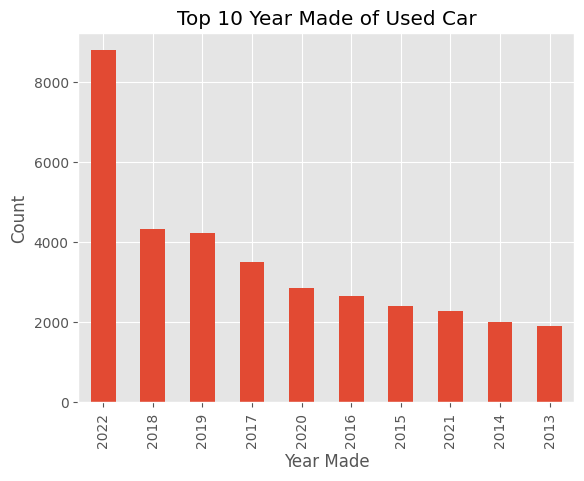

In [121]:
# Find out what is the year made of most of the used car on sales
ax = df['Year_Made'].value_counts()\
  .head(10)\
  .plot(kind='bar', title="Top 10 Year Made of Used Car")
ax.set_xlabel('Year Made')
ax.set_ylabel('Count')
plt.show()

# By the plot, we can see most of the used cars on sales are very new

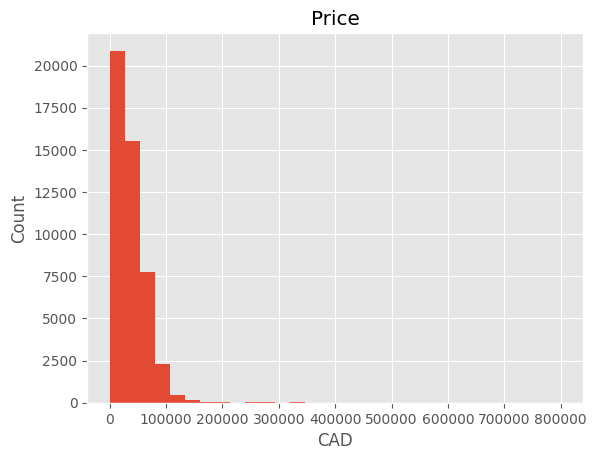

In [122]:
# Find out the distribution of the price
ax=df['Price']\
  .plot(kind='hist', bins=30, title="Price")
ax.set_xlabel('CAD')
ax.set_ylabel('Count')
plt.show()

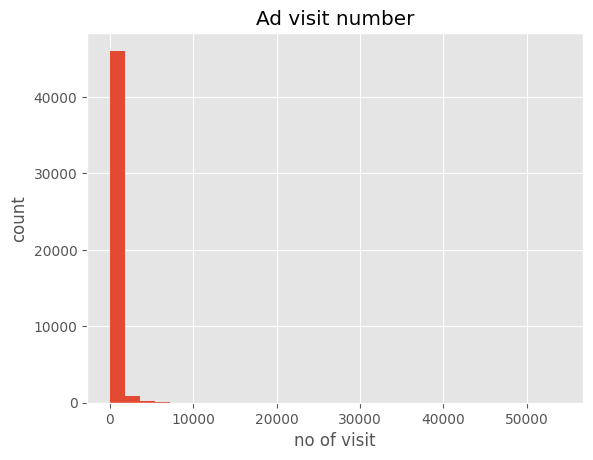

In [123]:
# Find out the distribution of the visit number
ax = df['No_of_Visit'].plot(kind='hist', 
                             title="Ad visit number", bins=30)
ax.set_xlabel('no of visit')
ax.set_ylabel('count')
plt.show()

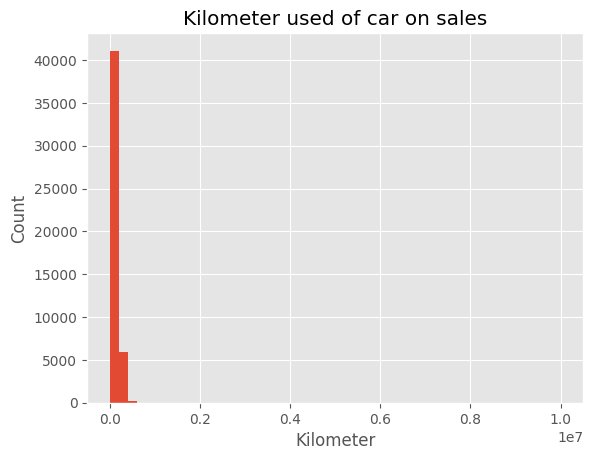

In [124]:
# Find out the distribution of the kilometer used
ax=df['Kilometers'].plot(kind='hist',
                      title='Kilometer used of car on sales',
                      bins=50)
ax.set_xlabel('Kilometer')
ax.set_ylabel('Count')
plt.show()

From above histograms, we found there are many outliers in every feature

In [125]:
# A function is defined to remove outlier if it is outside 1.5 IQR
def remove_outlier(df, columns):
  ''' The function remove outlier if value outside 1.5 IQR

      input: df = dataframe, columns = list of column name
      output: df = dataframe with outlier removed 
  '''
  for col in columns:
    perc25=np.percentile(df[col].dropna(),25)
    perc75=np.percentile(df[col].dropna(),75)
    iqr=perc75-perc25
    upper=perc75+1.5*iqr
    lower=perc25-1.5*iqr
    df=df[df[col].between(lower,upper)]

  return df.reset_index(drop=True).copy()

In [126]:
# Remove outlier
df=remove_outlier(df,['Price','Kilometers','No_of_Visit'])

<Axes: >

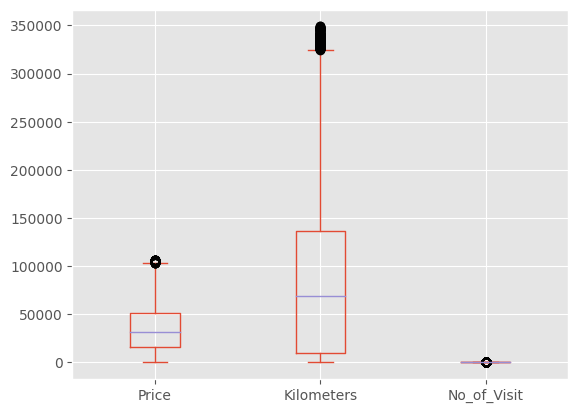

In [127]:
# Examine the boxplot after outlier removed
df[['Price','Kilometers','No_of_Visit']].plot(kind='box')

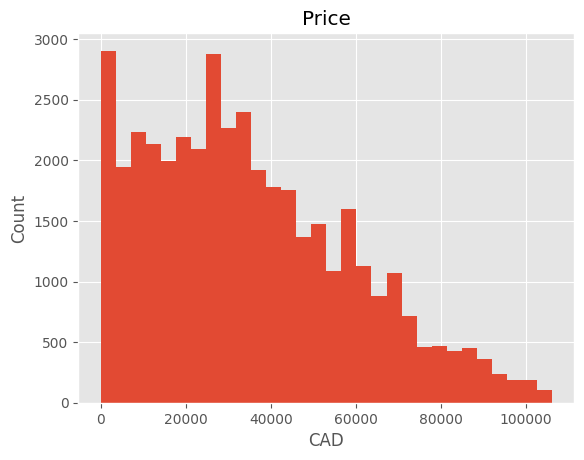

In [128]:
# Find out the distribution of the price
ax=df['Price']\
  .plot(kind='hist', bins=30, title="Price")
ax.set_xlabel('CAD')
ax.set_ylabel('Count')
plt.show()

In [129]:
# Since $0 for a car is impossible, we drop date with price less than $1000
df=df.query('Price >= 1000').reset_index(drop=True).copy()

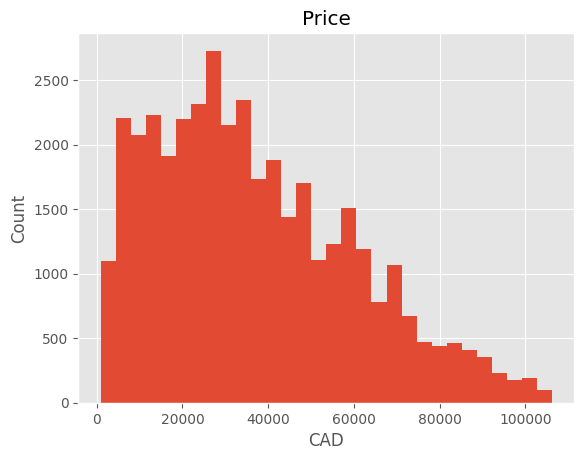

In [130]:
# price histogram again
ax=df['Price']\
  .plot(kind='hist', bins=30, title="Price")
ax.set_xlabel('CAD')
ax.set_ylabel('Count')
plt.show()

From above, the overall price of used car is around $30,000

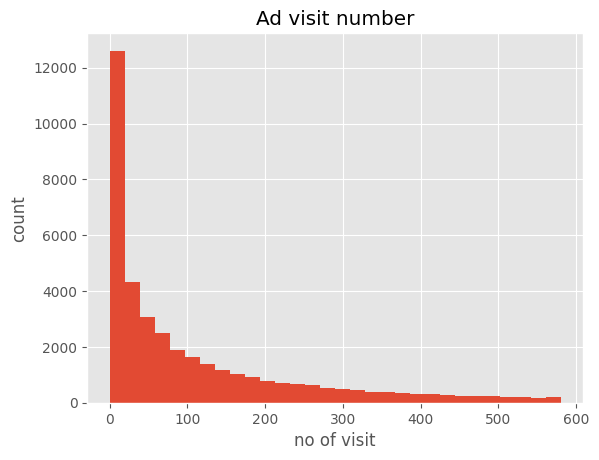

In [131]:
# Distribution of ad visit number
ax = df['No_of_Visit'].plot(kind='hist', 
                             title="Ad visit number", bins=30)
ax.set_xlabel('no of visit')
ax.set_ylabel('count')
plt.show()

From above, we can see most of the ads have not been visited

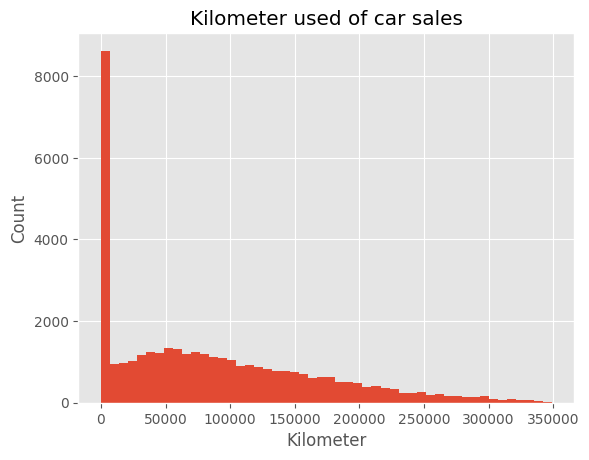

In [132]:
# Kilometer used distribution
ax=df['Kilometers'].plot(kind='hist',
                      title='Kilometer used of car sales',
                      bins=50)
ax.set_xlabel('Kilometer')
ax.set_ylabel('Count')
plt.show()

The histogram shows most of the car on sales are new.<br>
Other than that, most of the owner will sell their car when it reach 50,000 km

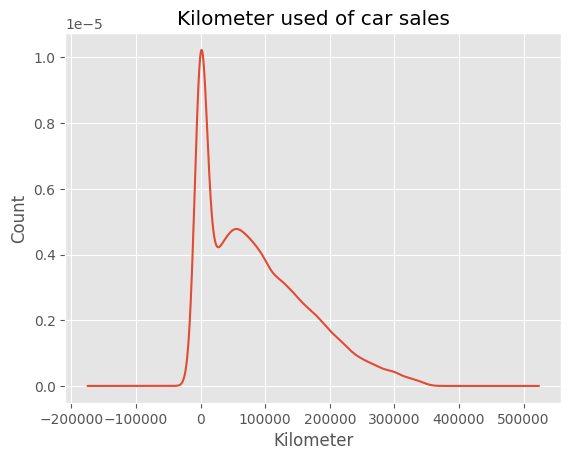

In [133]:
# Another look on the distribution of kilometer
ax=df['Kilometers'].plot(kind='kde',
                      title='Kilometer used of car sales')
ax.set_xlabel('Kilometer')
ax.set_ylabel('Count')
plt.show()

##Feature Relationship

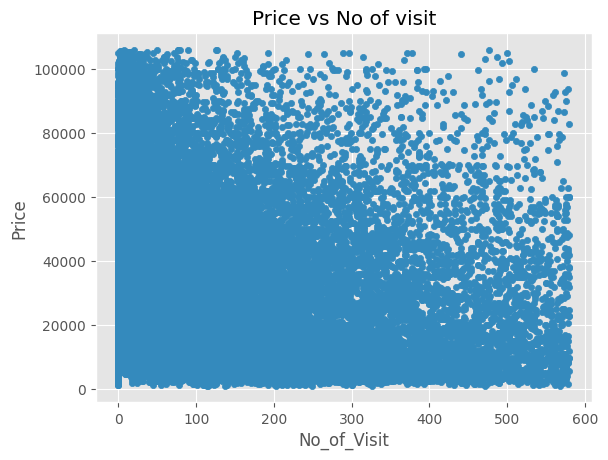

In [134]:
# Scatter plot to find out relationship between price and visit
df.plot(kind='scatter',
        x='No_of_Visit',
        y='Price',
        title='Price vs No of visit')
plt.show()

From below, it seems there is no/weak relationship between price and visit

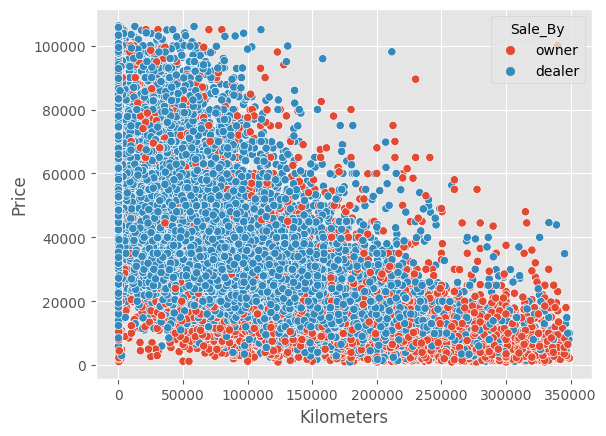

In [135]:
# Scatter plot to find out relationship between price and kilometer used
sns.scatterplot(x='Kilometers',
                y='Price',
                hue='Sale_By',
                data=df)
plt.show()

From above, price and kilometer used are negatively correlated.<br>
Also, dealer tends to sell new car while owner sells car after certain amount of use.

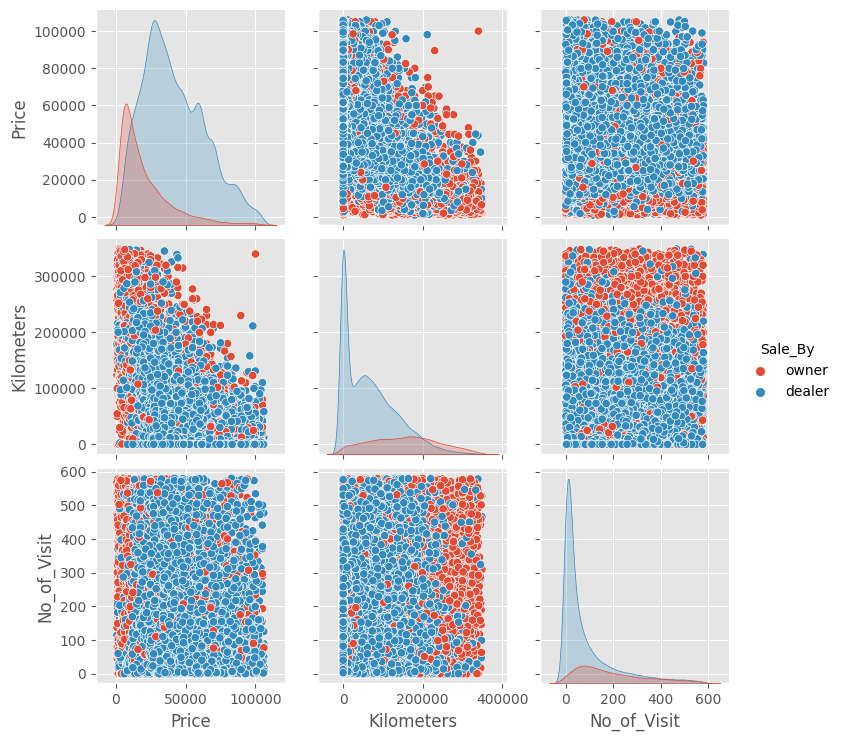

In [136]:
# Relationship between price, kilometers and visit
sns.pairplot(df, vars=['Price','Kilometers','No_of_Visit'],
             hue='Sale_By')
plt.show()

 With the plots above, we can figure out,
 1. Cars sold by owner are cheaper
 2. Cars sold by dealer usually have lower kilometer used
 3. There are more visits to dealers' advertisement

<Axes: >

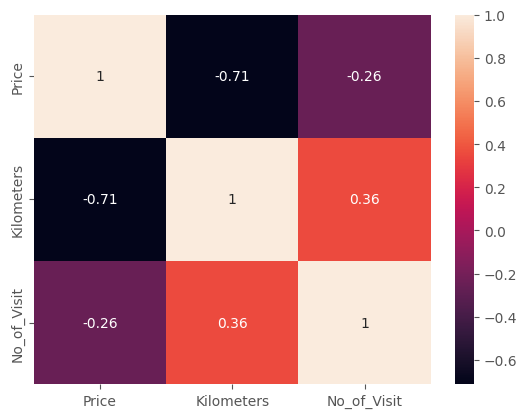

In [137]:
# Visualize the correlation with heatmap
df_corr=df[['Price','Kilometers','No_of_Visit']].dropna().corr()
sns.heatmap(df_corr, annot=True)

The heatmap shows that price is negatively correlated with kilometer used and the number of visit with different level.<br>
While people seem to visit ads of high-kilometer-used car.

#Ask question about data

1.   Which city has the largest used car market?
2.   Median price of car by city?
3.   When will owners usually sell their car?
4.   Does fuel type correlated with the price?
5.   In Calgary, what car make and kilometer used you can get if your budget is less than 15000?

## Which city has the largest used car market?

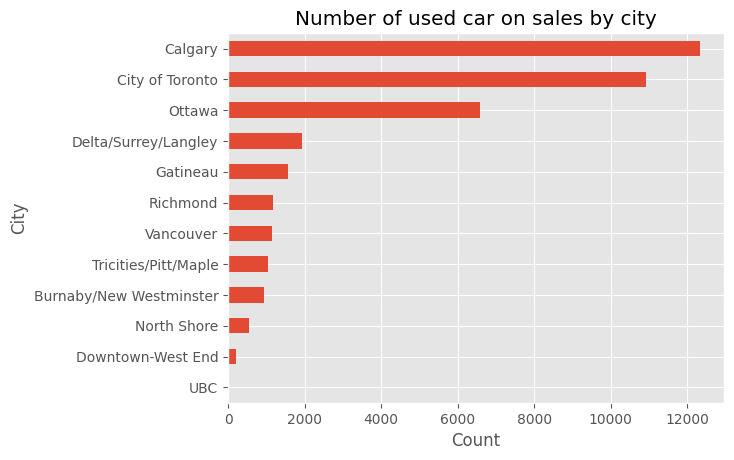

In [138]:
ax=df['City'].value_counts().\
sort_values(ascending=True)\
.plot(kind='barh', title='Number of used car on sales by city')
ax.set_xlabel('Count')
ax.set_ylabel('City')
plt.show()

## Median price of car by city?

In [139]:
df.groupby('City')['Price'].agg('median').sort_values(ascending=False)

City
Tricities/Pitt/Maple       54849.0
North Shore                52990.0
Delta/Surrey/Langley       47994.0
Richmond                   41990.0
Downtown-West End          40120.0
Burnaby/New Westminster    35942.5
Calgary                    32990.0
Ottawa                     31900.0
Vancouver                  30389.5
City of Toronto            27999.0
Gatineau                   27995.0
UBC                        10300.0
Name: Price, dtype: float64

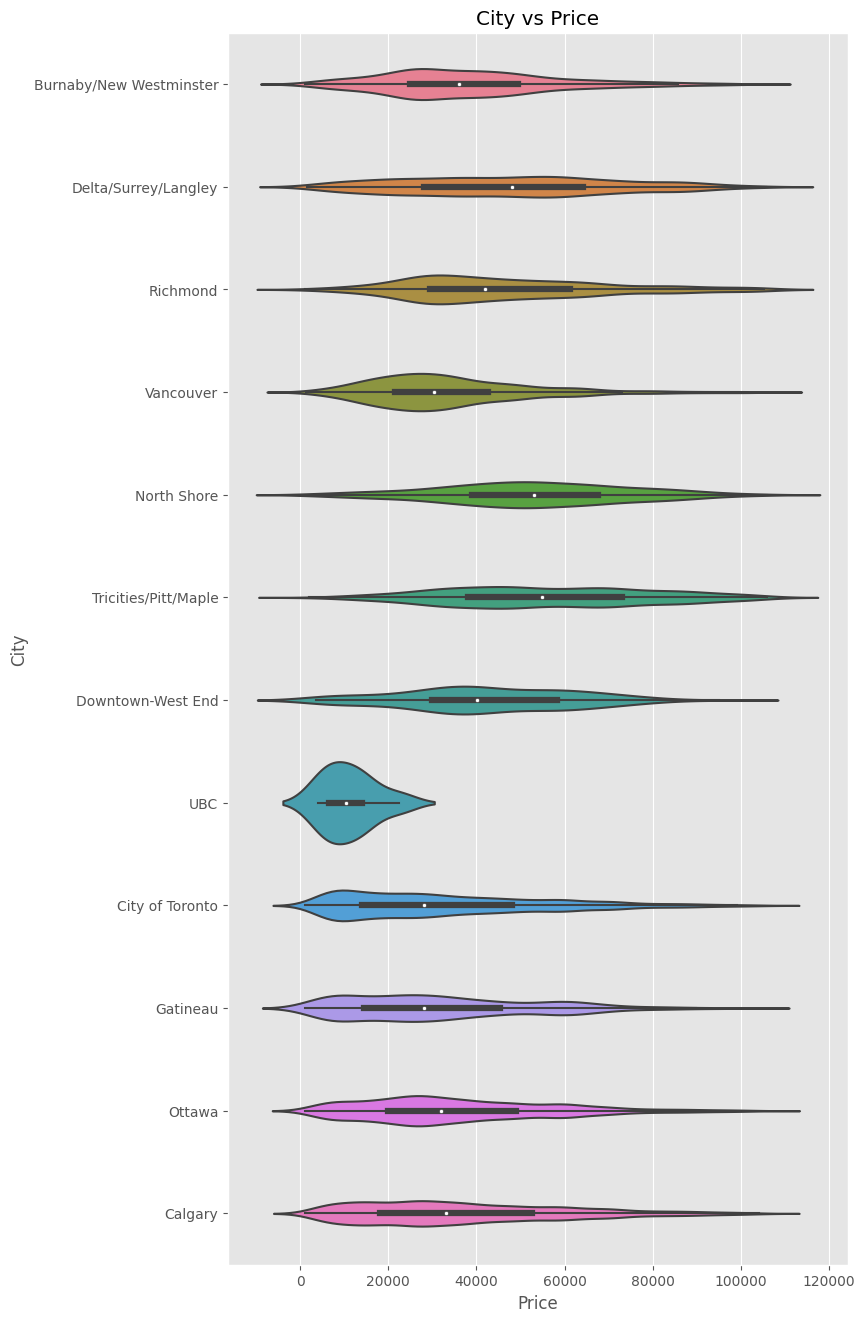

In [140]:
df.groupby('City')['Price'].agg('median')
plt.figure(figsize=(8,16))
g=sns.violinplot(data=df, x='Price', y='City', palette='husl')
g.set_title('City vs Price')
plt.show()

Tricities/Pitt/Maple in Vancouver has the highest median price with a wide price range as shown in the violin plot. 

## When will owners usually sell their car?

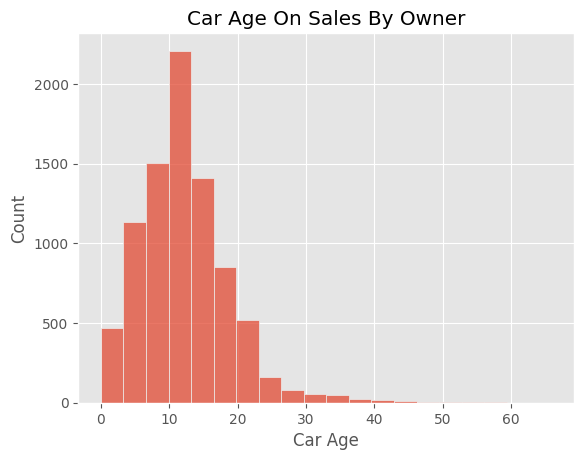

In [141]:
df['Car_Age']=2023-df['Year_Made'] # create car age column 
g=sns.histplot(data=df.query("Sale_By=='owner'")['Car_Age'], bins=20)
g.set_xlabel('Car Age')
g.set_title('Car Age On Sales By Owner')
plt.show()

The graph shows car owners usually sell their car after 10 year of use.

## Does fuel type correlated with the price?

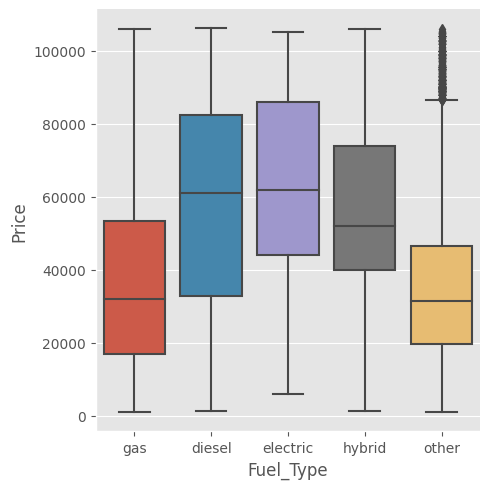

In [142]:
order=['gas', 'diesel', 'electric', 'hybrid', 'other']
sns.catplot(data=df,kind='box',x='Fuel_Type',y='Price', order=order)
plt.show()

From the box plot, car price is correlated with the fuel type with diesel and electric car are marked higher price while gas car is marked with lower price.

## In Calgary, what car make and kilometer used you can get if your budget is less than 15000?

In [143]:
q=df.query("City=='Calgary' & Price <= 15000")

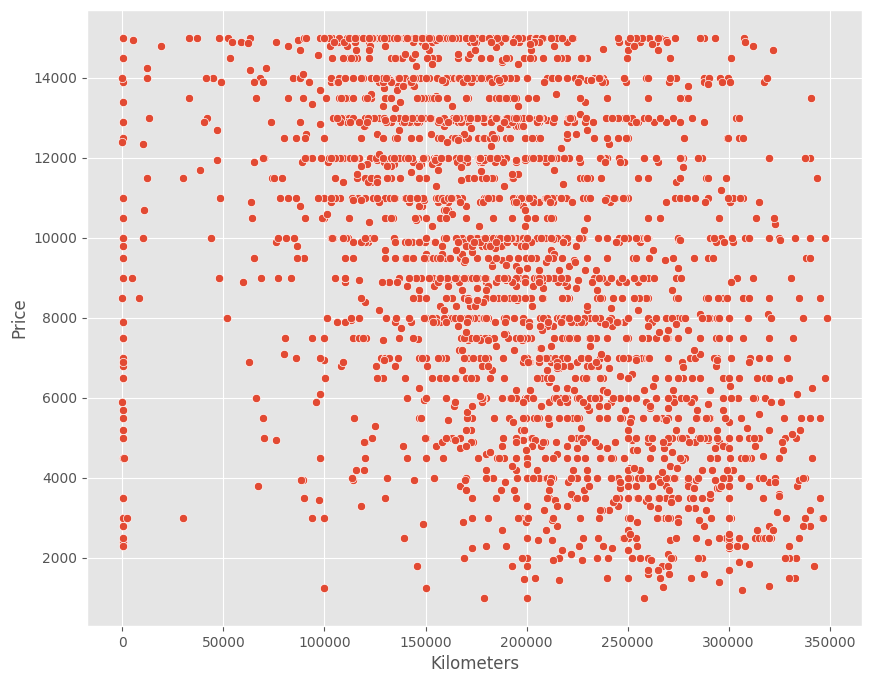

In [144]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=q, x='Kilometers', y='Price')
plt.show()

It looks like if your budget is around $15,000, the kilometer used will range from 10,000 to 23,000. If the budget reduces, the kilometer used will be increased.

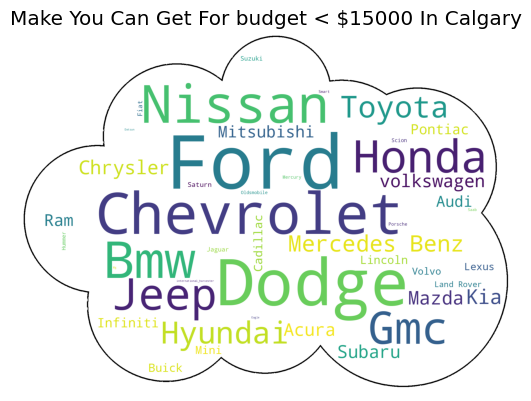

In [145]:
# Word cloud for visualization
from wordcloud import WordCloud, STOPWORDS # for remove words like and, or, the...
from PIL import Image

string=' '.join(q['Make'].to_list())

img_path='/content/gdrive/My Drive/dataset/Python/cloud.png'
cloud_mask=255-np.array(Image.open(img_path))
# cloud_mask=transform_format(cloud_mask.all())
wordcloud=WordCloud(mask=cloud_mask,
                    background_color='white',
                    contour_color='black',
                    contour_width=3,
                    min_font_size=10,
                    max_font_size=300).generate(string)

plt.imshow(wordcloud)
plt.title('Make You Can Get For budget < $15000 In Calgary')
plt.grid(False)
plt.axis('off')
plt.show()

The car make you are likely to get is Ford, Dodge and Chevrolet if your budget is less than $15,000.